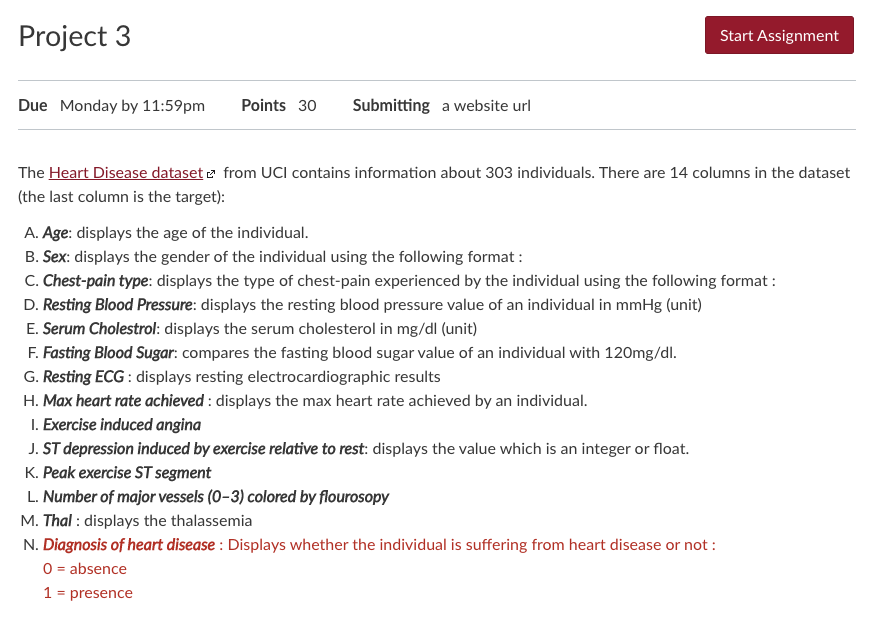

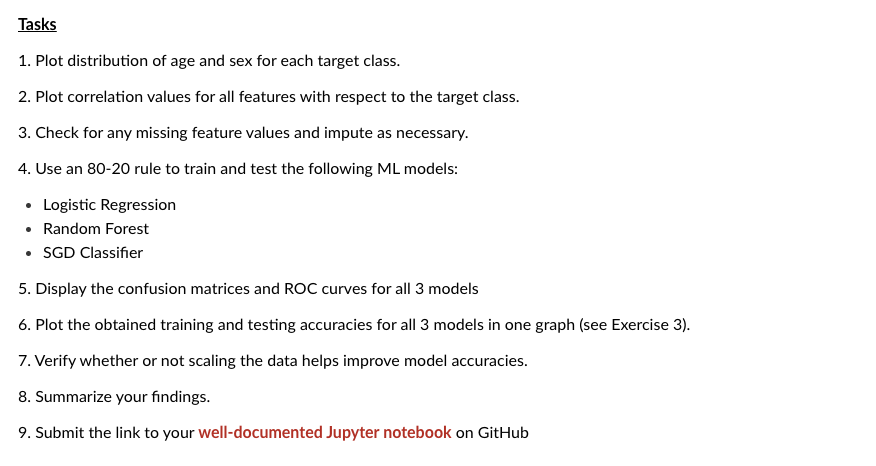

In [1]:
# Load in the required libraries for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the Epicurious dataset from github
url = 'https://raw.githubusercontent.com/jimgrasell/AML/master/Project03/Data/heart.csv'
df = pd.read_csv(url)
#df.head()
print('Shape of the dataframe: ',df.shape)

HTTPError: ignored